In [19]:
import numpy as np 
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import KFold, GroupKFold

from sklearn.ensemble import VotingRegressor

#import optuna

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
#from catboost import CatBoostRegressor
import gc
pd.set_option('display.max_columns', None)
#########################################################
input_dir = 'data/'

In [20]:
train = pd.read_csv(input_dir+'train.csv')

In [128]:
id1 = train.groupby('breath_id').get_group(1)
id2 = train.groupby('breath_id').get_group(2)
id3 = train.groupby('breath_id').get_group(3)


In [22]:
id1

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
75,76,1,20,50,2.553593,4.974474,1,6.399909
76,77,1,20,50,2.587754,4.978481,1,6.610815
77,78,1,20,50,2.621773,4.981847,1,6.329607
78,79,1,20,50,2.655746,4.984683,1,6.540513


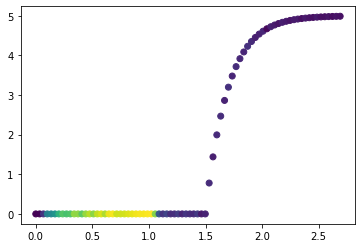

In [33]:
plt.scatter(id1.time_step,id1.u_in*id1.u_out,c = id1.pressure)

In [36]:
id1.u_out.diff().sum()

1.0

In [41]:
a= train.groupby('breath_id')['u_out'].diff()

In [43]:
a.sum()

75450.0

In [46]:
train.breath_id.unique().shape

(75450,)

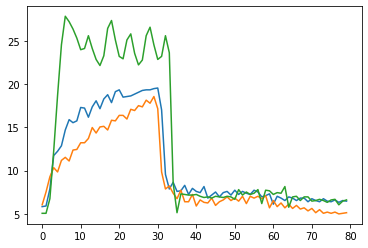

In [53]:
plt.plot(id1.pressure.values)
plt.plot(id2.pressure.values)
plt.plot(id3.pressure.values)

# test pareto generalized

In [54]:
import pandas as pd 
import numpy as np
import numpy as np
from sklearn import linear_model as lm
from sklearn.preprocessing import StandardScaler
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from numpy.random import seed
from numpy.random import randn

In [158]:
def lin_fit(df,tr=True,vis = False):
#     df = train.groupby('breath_id').get_group(i)
    def err_curve(x, a,y,u,s):
    #     b= 1.5
        u_in , time_step = x
        return (a/y) * (((x-u)/s)**((1/y)-1)) * ((1+((x-u)/s)**(1/y))**(-1-a)) 
    # Fit the curve
    def fit_err(Time,X):
    #     popt, pcov = 
        return curve_fit(err_curve, Time, X,p0 =[ 1,100,-0.002,1], bounds=(-1000000,1000000), maxfev=10000000)
    popt,_ = fit_err(df.time_step.values,df.pressure.values)
    a,y,u,s = popt
    Y = err_curve(df.time_step.values, a,y,u,s)
    if vis :
        print(popt)
        plt.plot(id2.pressure.values)
        plt.plot(Y)
    else :
        return Y
    

In [417]:
# train['lin_model'] = train.groupby('breath_id').apply(lambda x: lin_fit(x))

In [416]:
# err_curve(id1.time_step.values, 1,2,-0.002,0.1)
# id1[['pressure','lin_model']].corr()
# train[train.breath_id.isin(list(range(1,4)))].corr()


In [415]:
# from tqdm import tqdm
# breath_ids = train.breath_id.unique().tolist()
# train['lin_model']  = 0
# for br_id in tqdm(breath_ids):
#     train.loc[train.breath_id == br_id,'lin_model']=lin_fit(i = br_id,vis = False)

<AxesSubplot:ylabel='Density'>

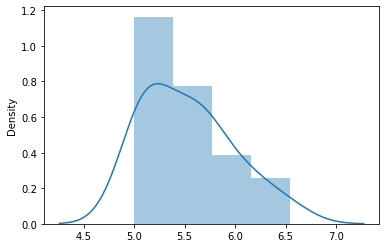

In [185]:
# plt.scatter(id1.u_in.values*id1.u_out.values,id1.pressure.values)
# import seaborn as sns
# sns.distplot(id2.pressure.values[60:])

In [137]:
# plt.plot(id2.u_in.rolling(window=10, min_periods=1).mean().values*id2.u_out.rolling(window=10, min_periods=1).mean().values)
# plt.plot(id2.u_in.ewm(halflife='time_step',adjust  = True).mean().values)
# plt.plot(id2.pressure.values)
# type(id2.time_step.values)
pd.to_datetime(id2['time_step'],format = "%S")


80    1900-01-01 00:00:00
81    1900-01-01 00:00:00
82    1900-01-01 00:00:00
83    1900-01-01 00:00:00
84    1900-01-01 00:00:00
              ...        
155   1900-01-01 00:00:02
156   1900-01-01 00:00:02
157   1900-01-01 00:00:02
158   1900-01-01 00:00:02
159   1900-01-01 00:00:02
Name: time_step, Length: 80, dtype: datetime64[ns]

In [189]:
id1_0 = id1[id1.u_out == 0]
id1_1 = id1[id1.u_out == 1]

In [209]:
# plt.plot((id1_0.time_step),(id1_0.pressure))
# plt.plot((id1_0.time_step),np.log(id1_0.u_in))
id1_0['log_u_in'] = np.log(id1_0['u_in'])
id1_0['log_pressure'] = np.log(id1_0['pressure'])
id1_0['log_time_step'] = np.log(id1_0['time_step'])


In [207]:
# id1_0.corr()
id1_1['log_u_in'] = np.log(id1_1['u_in'])
id1_1['log_pressure'] = np.log(id1_1['pressure'])

In [210]:
id1_0.corr()

,id,breath_id,R,C,time_step,u_in,u_out,pressure,lin_model,log_u_in,log_pressure,log_time_step
id,1.000000,NaN,NaN,NaN,0.999999,-0.243773,NaN,0.848241,0.518611,0.183283,0.775382,0.921279
breath_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_step,0.999999,NaN,NaN,NaN,1.000000,-0.244538,NaN,0.847797,0.517862,0.182689,0.774885,0.921012
u_in,-0.243773,NaN,NaN,NaN,-0.244538,1.000000,NaN,0.208251,0.667691,0.829010,0.330701,-0.374933
u_out,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pressure,0.848241,NaN,NaN,NaN,0.847797,0.208251,NaN,1.000000,0.859216,0.451511,0.987139,0.976885
lin_model,0.518611,NaN,NaN,NaN,0.517862,0.667691,NaN,0.859216,1.000000,0.754234,0.906674,0.754709
log_u_in,0.183283,NaN,NaN,NaN,0.182689,0.829010,NaN,0.451511,0.754234,1.000000,0.532259,-0.385330


In [428]:
def lin_fit2(df,tr=True,vis = False):
#     df = train.groupby('breath_id').get_group(i)
    print("handling " + str(df.breath_id.unique()))
    def err_curve(x, a,b,c):
    #     b= 1.5
        time_step = x
        return c * np.log(a*time_step + b) #+ u_out * d *(1/(time_step+e))**(f)
    # Fit the curve
    def fit_err(Time,X):
    #     popt, pcov = 
        return curve_fit(err_curve, Time, X,p0 =[ 1,10,1], bounds=(-1000000,1000000), maxfev=10000000)
    popt,_ = fit_err(df.loc[df.u_out==0,'time_step'].values,df.loc[df.u_out==0,'pressure'].values)
    a,b,c= popt
#     df['a'] = a
#     df['b'] = b
#     df['c'] = c
    Y = err_curve(df.loc[df.u_out==0,'time_step'].values, a,b,c)
    if vis :
        print(popt)
        plt.plot(df.loc[df.u_out==0,'pressure'].values)
        plt.plot(Y)
#     else :
#         return Y
    def err_curve2(x, d,e,f):
    #     b= 1.5
        time_step = x
        return d *(1/(time_step+abs(e)))**(f)
    # Fit the curve
    def fit_err2(Time,X):
    #     popt, pcov = 
        return curve_fit(err_curve2, Time, X,p0 =[ 1,10,1], bounds=(-1000000,1000000), maxfev=10000000)
    popt,_ = fit_err2(df.loc[df.u_out==1,'time_step'].values,df.loc[df.u_out==1,'pressure'].values)
    d,e,f= popt
#     new_df['d'] = d
#     new_df['e'] = e
#     new_df['f'] = f
    Y = err_curve2(df.loc[df.u_out==1,'time_step'].values, d,e,f)
    if vis :
        print(popt)
        plt.plot(df.loc[df.u_out==1,'pressure'].values)
        plt.plot(Y)
#     else :
#         return Y
    return a,b,c,d,e,f

handling [1]
[-2.35869040e+04  2.36107389e+04  2.43544062e+00]
[ 6.90994611e-01  1.06254485e-07 -2.25624207e+00]


(-23586.903990361683,
 23610.73889929602,
 2.435440624287216,
 0.6909946110956897,
 1.0625448540853191e-07,
 -2.2562420710852247)

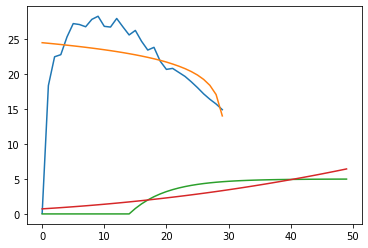

In [429]:
def lin_fit2_in(df,tr=True,vis = False):
#     df = train.groupby('breath_id').get_group(i)
    print("handling " + str(df.breath_id.unique()))
    def err_curve(x, a,b,c):
    #     b= 1.5
        time_step = x
        return c * np.log(a*time_step + b) #+ u_out * d *(1/(time_step+e))**(f)
    # Fit the curve
    def fit_err(Time,X):
    #     popt, pcov = 
        return curve_fit(err_curve, Time, X,p0 =[ 1,10,1], bounds=(-1000000,1000000), maxfev=10000000)
    popt,_ = fit_err(df.loc[df.u_out==0,'time_step'].values,df.loc[df.u_out==0,'u_in'].values)
    a,b,c= popt
#     df['a'] = a
#     df['b'] = b
#     df['c'] = c
    Y = err_curve(df.loc[df.u_out==0,'time_step'].values, a,b,c)
    if vis :
        print(popt)
        plt.plot(df.loc[df.u_out==0,'u_in'].values)
        plt.plot(Y)
#     else :
#         return Y
    def err_curve2(x, d,e,f):
    #     b= 1.5
        time_step = x
        return d *(1/(time_step+abs(e)))**(f)
    # Fit the curve
    def fit_err2(Time,X):
    #     popt, pcov = 
        return curve_fit(err_curve2, Time, X,p0 =[ 1,10,1], bounds=(-1000000,1000000), maxfev=10000000)
    popt,_ = fit_err2(df.loc[df.u_out==1,'time_step'].values,df.loc[df.u_out==1,'u_in'].values)
    d,e,f= popt
#     new_df['d'] = d
#     new_df['e'] = e
#     new_df['f'] = f
    Y = err_curve2(df.loc[df.u_out==1,'time_step'].values, d,e,f)
    if vis :
        print(popt)
        plt.plot(df.loc[df.u_out==1,'u_in'].values)
        plt.plot(Y)
#     else :
#         return Y
    return a,b,c,d,e,f
lin_fit2_in(id1,tr=True,vis = True)

handling [1]
[111.20672512   2.9963598    4.27510728]
[1.11780762e+01 5.83822423e-08 6.99673832e-01]


(111.20672512376913,
 2.996359796972625,
 4.275107281847082,
 11.178076168802429,
 5.838224231877143e-08,
 0.6996738315054903)

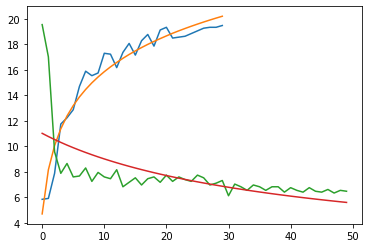

In [430]:

lin_fit2(id1,tr=True,vis = True)
# fit_err2(id1.loc[id1.u_out==1,'time_step'].values,id1.loc[id1.u_out==1,'pressure'].values)
# test = train.loc[train.breath_id.isin(train.breath_id.unique().tolist()[:600])]

In [437]:
# plt.plot(id1.u_in)
# plt.plot(id1.pressure)
id1['u_id_diff'] = id1.u_in.diff().fillna(0)

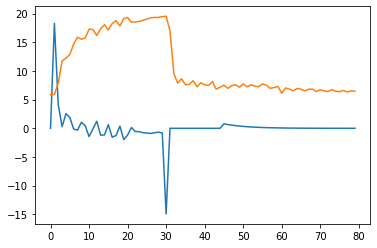

In [439]:
plt.plot(id1.u_id_diff)
plt.plot(id1.pressure)

In [300]:
ids = new_df.breath_id.unique().tolist()
for idz in tqdm(ids):
    a,b,c,d,e,f = lin_fit2(test.loc[test.breath_id == idz],tr=True,vis = True)
    new_df.loc[new_df.breath_id ==idz,'a'] = a
    new_df.loc[new_df.breath_id ==idz,'b'] = b
    new_df.loc[new_df.breath_id ==idz,'c'] = c
    new_df.loc[new_df.breath_id ==idz,'d'] = d
    new_df.loc[new_df.breath_id ==idz,'e'] = e
    new_df.loc[new_df.breath_id ==idz,'f'] = f

  0%|▎                                                                                 | 2/600 [00:00<00:43, 13.89it/s]

handling [1]
handling [2]
handling [3]


  1%|▊                                                                                 | 6/600 [00:00<00:34, 17.15it/s]

handling [4]
handling [5]
handling [6]
handling [7]


  2%|█▎                                                                               | 10/600 [00:01<01:15,  7.76it/s]

handling [9]
handling [10]
handling [12]


  2%|█▊                                                                               | 13/600 [00:01<00:54, 10.69it/s]

handling [13]
handling [14]
handling [15]
handling [16]
handling [17]


  3%|██▍                                                                              | 18/600 [00:01<00:41, 13.89it/s]

handling [18]
handling [19]
handling [20]
handling [21]


  4%|██▊                                                                              | 21/600 [00:01<00:36, 16.00it/s]

handling [22]
handling [23]
handling [25]


  4%|███▍                                                                             | 25/600 [00:01<00:35, 16.38it/s]

handling [26]
handling [27]
handling [28]
handling [29]


  5%|███▉                                                                             | 29/600 [00:02<00:33, 16.92it/s]

handling [30]
handling [32]
handling [34]
handling [35]


  6%|████▍                                                                            | 33/600 [00:02<00:34, 16.30it/s]

handling [36]
handling [37]
handling [39]


  6%|████▋                                                                            | 35/600 [00:02<00:35, 16.08it/s]

handling [40]
handling [41]
handling [42]
handling [43]


  6%|█████▎                                                                           | 39/600 [00:02<00:34, 16.06it/s]

handling [44]
handling [46]
handling [47]
handling [48]


  7%|█████▊                                                                           | 43/600 [00:03<00:32, 17.10it/s]

handling [49]
handling [52]
handling [53]
handling [54]


  8%|██████▍                                                                          | 48/600 [00:03<00:32, 16.75it/s]

handling [55]
handling [57]
handling [58]
handling [59]


  9%|███████▏                                                                         | 53/600 [00:03<00:29, 18.31it/s]

handling [60]
handling [61]
handling [63]
handling [64]
handling [66]


  9%|███████▍                                                                         | 55/600 [00:03<00:42, 12.83it/s]

handling [67]
handling [68]
handling [69]


 10%|███████▉                                                                         | 59/600 [00:04<01:22,  6.54it/s]

handling [70]
handling [71]
handling [72]


 10%|████████▏                                                                        | 61/600 [00:05<01:07,  8.00it/s]

handling [73]
handling [75]


 11%|████████▊                                                                        | 65/600 [00:05<01:15,  7.08it/s]

handling [76]
handling [77]
handling [79]
handling [82]


 12%|█████████▎                                                                       | 69/600 [00:05<00:51, 10.27it/s]

handling [83]
handling [84]
handling [87]
handling [89]
handling [90]


 12%|█████████▉                                                                       | 74/600 [00:06<00:39, 13.26it/s]

handling [92]
handling [93]
handling [94]
handling [100]
handling [101]


 13%|██████████▎                                                                      | 76/600 [00:06<00:44, 11.68it/s]

handling [104]
handling [106]


 13%|██████████▌                                                                      | 78/600 [00:07<01:41,  5.14it/s]

handling [108]


 13%|██████████▊                                                                      | 80/600 [00:08<02:18,  3.75it/s]

handling [111]
handling [112]


 14%|███████████                                                                      | 82/600 [00:09<02:40,  3.23it/s]

handling [114]
handling [115]
handling [117]


 15%|███████████▉                                                                     | 88/600 [00:09<01:07,  7.55it/s]

handling [118]
handling [119]
handling [120]
handling [122]
handling [125]


 16%|████████████▌                                                                    | 93/600 [00:09<00:44, 11.36it/s]

handling [126]
handling [129]
handling [130]
handling [131]


 16%|████████████▉                                                                    | 96/600 [00:09<00:36, 13.63it/s]

handling [133]
handling [134]
handling [135]
handling [136]
handling [138]


 17%|█████████████▍                                                                  | 101/600 [00:10<00:33, 14.79it/s]

handling [141]
handling [142]
handling [143]
handling [144]
handling [146]
handling [147]


 18%|██████████████▏                                                                 | 106/600 [00:11<01:18,  6.29it/s]

handling [148]
handling [149]
handling [150]
handling [151]
handling [152]


 18%|██████████████▊                                                                 | 111/600 [00:11<00:49,  9.82it/s]

handling [154]
handling [155]
handling [156]
handling [157]
handling [160]


 19%|███████████████▍                                                                | 116/600 [00:12<00:36, 13.14it/s]

handling [162]
handling [163]
handling [164]
handling [165]


 20%|████████████████                                                                | 120/600 [00:13<01:20,  5.97it/s]

handling [166]
handling [167]
handling [169]
handling [170]


 21%|████████████████▋                                                               | 125/600 [00:13<00:51,  9.29it/s]

handling [172]
handling [173]
handling [175]
handling [176]


 21%|████████████████▉                                                               | 127/600 [00:13<00:43, 10.80it/s]

handling [177]
handling [179]
handling [181]


 22%|█████████████████▌                                                              | 132/600 [00:14<01:09,  6.76it/s]

handling [183]
handling [184]
handling [186]
handling [187]


 22%|█████████████████▊                                                              | 134/600 [00:15<01:23,  5.59it/s]

handling [188]
handling [189]
handling [190]
handling [191]


 23%|██████████████████▋                                                             | 140/600 [00:15<00:53,  8.65it/s]

handling [192]
handling [193]
handling [197]
handling [199]
handling [201]
handling [202]


 24%|███████████████████▍                                                            | 146/600 [00:16<00:36, 12.57it/s]

handling [203]
handling [204]
handling [207]
handling [208]


 25%|███████████████████▋                                                            | 148/600 [00:16<01:09,  6.47it/s]

handling [211]
handling [212]
handling [213]
handling [214]


 26%|████████████████████▍                                                           | 153/600 [00:17<00:47,  9.39it/s]

handling [216]
handling [217]
handling [218]
handling [219]


 26%|█████████████████████▏                                                          | 159/600 [00:17<00:32, 13.47it/s]

handling [221]
handling [223]
handling [224]
handling [225]


 27%|█████████████████████▍                                                          | 161/600 [00:17<00:30, 14.31it/s]

handling [226]
handling [227]
handling [229]
handling [230]


 28%|██████████████████████▏                                                         | 166/600 [00:17<00:25, 17.15it/s]

handling [231]
handling [234]
handling [235]
handling [237]
handling [238]


 28%|██████████████████████▋                                                         | 170/600 [00:18<00:51,  8.39it/s]

handling [239]
handling [240]
handling [241]
handling [242]


 29%|███████████████████████▎                                                        | 175/600 [00:19<00:34, 12.17it/s]

handling [244]
handling [245]
handling [249]
handling [251]
handling [254]
handling [255]


 30%|████████████████████████                                                        | 180/600 [00:19<00:27, 15.30it/s]

handling [256]
handling [257]
handling [258]
handling [259]
handling [262]


 31%|████████████████████████▊                                                       | 186/600 [00:19<00:23, 17.96it/s]

handling [263]
handling [264]
handling [267]
handling [270]
handling [271]


 32%|█████████████████████████▌                                                      | 192/600 [00:19<00:20, 20.03it/s]

handling [275]
handling [277]
handling [278]
handling [280]
handling [281]


 32%|██████████████████████████                                                      | 195/600 [00:19<00:21, 19.15it/s]

handling [283]
handling [284]
handling [285]
handling [286]


 34%|██████████████████████████▊                                                     | 201/600 [00:20<00:20, 19.93it/s]

handling [287]
handling [289]
handling [290]
handling [292]


 34%|███████████████████████████▏                                                    | 204/600 [00:20<00:20, 19.25it/s]

handling [294]
handling [296]
handling [297]
handling [298]


 34%|███████████████████████████▌                                                    | 207/600 [00:20<00:19, 20.32it/s]

handling [299]
handling [302]
handling [303]
handling [304]
handling [305]


 35%|████████████████████████████                                                    | 210/600 [00:20<00:19, 19.51it/s]

handling [307]


 36%|████████████████████████████▌                                                   | 214/600 [00:25<02:37,  2.45it/s]

handling [309]
handling [313]
handling [314]
handling [316]
handling [317]


 37%|█████████████████████████████▎                                                  | 220/600 [00:25<01:17,  4.90it/s]

handling [319]
handling [321]
handling [323]
handling [324]
handling [325]


 38%|██████████████████████████████                                                  | 225/600 [00:27<01:51,  3.37it/s]

handling [326]
handling [327]
handling [328]
handling [329]
handling [331]


 38%|██████████████████████████████▍                                                 | 228/600 [00:27<01:20,  4.65it/s]

handling [332]
handling [333]
handling [334]
handling [335]


 38%|██████████████████████████████▋                                                 | 230/600 [00:28<01:40,  3.69it/s]

handling [337]
handling [338]


 39%|███████████████████████████████▏                                                | 234/600 [00:29<01:34,  3.86it/s]

handling [340]
handling [342]
handling [344]
handling [345]
handling [346]


 40%|███████████████████████████████▊                                                | 239/600 [00:30<00:54,  6.58it/s]

handling [349]
handling [352]
handling [353]
handling [354]


 40%|████████████████████████████████▍                                               | 243/600 [00:30<00:38,  9.31it/s]

handling [356]
handling [357]
handling [358]
handling [359]


 41%|████████████████████████████████▉                                               | 247/600 [00:30<00:31, 11.13it/s]

handling [362]
handling [363]
handling [364]


 42%|█████████████████████████████████▌                                              | 252/600 [00:31<00:32, 10.58it/s]

handling [366]
handling [367]
handling [369]
handling [370]


 42%|██████████████████████████████████                                              | 255/600 [00:31<00:26, 12.93it/s]

handling [371]
handling [372]
handling [373]
handling [376]
handling [377]


 44%|██████████████████████████████████▊                                             | 261/600 [00:31<00:20, 16.44it/s]

handling [379]
handling [381]
handling [385]
handling [386]


 44%|███████████████████████████████████▏                                            | 264/600 [00:31<00:18, 18.16it/s]

handling [387]
handling [388]
handling [389]
handling [391]
handling [392]


 44%|███████████████████████████████████▌                                            | 267/600 [00:32<00:17, 18.60it/s]

handling [394]
handling [395]
handling [397]
handling [399]


 46%|████████████████████████████████████▍                                           | 273/600 [00:32<00:25, 12.74it/s]

handling [400]
handling [402]
handling [403]
handling [404]
handling [405]


 46%|█████████████████████████████████████                                           | 278/600 [00:32<00:21, 14.99it/s]

handling [407]
handling [410]
handling [411]
handling [412]


 47%|█████████████████████████████████████▌                                          | 282/600 [00:33<00:19, 16.03it/s]

handling [413]
handling [414]
handling [415]
handling [416]


 48%|██████████████████████████████████████                                          | 285/600 [00:33<00:18, 17.39it/s]

handling [417]
handling [418]
handling [422]
handling [423]
handling [427]


 48%|██████████████████████████████████████▋                                         | 290/600 [00:33<00:17, 18.05it/s]

handling [428]
handling [429]
handling [430]
handling [432]
handling [433]


 49%|███████████████████████████████████████                                         | 293/600 [00:33<00:15, 19.85it/s]

handling [434]
handling [436]


 50%|███████████████████████████████████████▋                                        | 298/600 [00:34<00:32,  9.42it/s]

handling [437]
handling [438]
handling [439]
handling [441]
handling [442]


 50%|████████████████████████████████████████▏                                       | 301/600 [00:34<00:25, 11.80it/s]

handling [443]
handling [446]


 50%|████████████████████████████████████████▍                                       | 303/600 [00:35<00:55,  5.34it/s]

handling [448]
handling [450]
handling [451]


 51%|█████████████████████████████████████████                                       | 308/600 [00:36<00:47,  6.11it/s]

handling [453]
handling [454]
handling [455]
handling [456]
handling [458]


 52%|█████████████████████████████████████████▋                                      | 313/600 [00:36<00:30,  9.56it/s]

handling [459]
handling [461]
handling [462]
handling [463]
handling [464]


 53%|██████████████████████████████████████████▏                                     | 316/600 [00:37<00:24, 11.79it/s]

handling [469]
handling [470]


 53%|██████████████████████████████████████████▋                                     | 320/600 [00:37<00:31,  8.80it/s]

handling [471]
handling [472]
handling [474]
handling [475]
handling [476]


 54%|███████████████████████████████████████████                                     | 323/600 [00:37<00:24, 11.42it/s]

handling [477]
handling [478]
handling [479]


 55%|███████████████████████████████████████████▋                                    | 328/600 [00:38<00:29,  9.20it/s]

handling [482]
handling [484]
handling [486]
handling [489]
handling [490]
handling [494]


 56%|████████████████████████████████████████████▌                                   | 334/600 [00:38<00:19, 13.53it/s]

handling [496]
handling [499]
handling [500]
handling [501]
handling [504]
handling [505]


 56%|█████████████████████████████████████████████▏                                  | 339/600 [00:39<00:28,  9.07it/s]

handling [506]
handling [508]
handling [510]
handling [511]


 57%|█████████████████████████████████████████████▋                                  | 343/600 [00:39<00:22, 11.30it/s]

handling [512]
handling [513]
handling [516]


 57%|██████████████████████████████████████████████                                  | 345/600 [00:40<00:22, 11.46it/s]

handling [518]
handling [519]


 58%|██████████████████████████████████████████████▌                                 | 349/600 [00:40<00:28,  8.95it/s]

handling [521]
handling [523]
handling [526]


 59%|██████████████████████████████████████████████▉                                 | 352/600 [00:40<00:21, 11.43it/s]

handling [528]
handling [530]
handling [532]
handling [534]
handling [535]

 60%|███████████████████████████████████████████████▌                                | 357/600 [00:41<00:16, 14.68it/s]


handling [536]
handling [538]
handling [539]


 60%|███████████████████████████████████████████████▊                                | 359/600 [00:41<00:16, 14.68it/s]

handling [540]
handling [541]
handling [542]


 60%|████████████████████████████████████████████████▍                               | 363/600 [00:42<00:37,  6.33it/s]

handling [543]
handling [545]
handling [546]


 61%|████████████████████████████████████████████████▋                               | 365/600 [00:42<00:30,  7.82it/s]

handling [547]
handling [551]
handling [553]
handling [555]


 62%|█████████████████████████████████████████████████▏                              | 369/600 [00:42<00:21, 10.94it/s]

handling [556]
handling [557]
handling [559]


 62%|█████████████████████████████████████████████████▋                              | 373/600 [00:43<00:18, 12.46it/s]

handling [560]
handling [561]
handling [564]


 62%|██████████████████████████████████████████████████                              | 375/600 [00:43<00:17, 12.79it/s]

handling [565]
handling [567]
handling [573]


 63%|██████████████████████████████████████████████████▌                             | 379/600 [00:43<00:16, 13.80it/s]

handling [574]
handling [575]
handling [578]
handling [579]
handling [581]


 64%|███████████████████████████████████████████████████                             | 383/600 [00:44<00:40,  5.37it/s]

handling [582]
handling [583]
handling [584]
handling [587]


 65%|███████████████████████████████████████████████████▋                            | 388/600 [00:45<00:23,  8.90it/s]

handling [588]
handling [589]
handling [591]


 65%|████████████████████████████████████████████████████                            | 390/600 [00:45<00:20, 10.34it/s]

handling [592]
handling [594]
handling [595]
handling [596]


 66%|████████████████████████████████████████████████████▌                           | 394/600 [00:45<00:17, 11.96it/s]

handling [597]
handling [598]
handling [600]
handling [601]


 66%|████████████████████████████████████████████████████▊                           | 396/600 [00:45<00:15, 12.80it/s]

handling [602]
handling [603]


 67%|█████████████████████████████████████████████████████▍                          | 401/600 [00:46<00:27,  7.31it/s]

handling [606]
handling [608]
handling [609]
handling [610]


 68%|██████████████████████████████████████████████████████                          | 405/600 [00:46<00:19, 10.26it/s]

handling [611]
handling [615]
handling [616]
handling [617]
handling [618]

 68%|██████████████████████████████████████████████████████▌                         | 409/600 [00:47<00:14, 13.10it/s]


handling [619]
handling [620]
handling [621]
handling [622]


 69%|███████████████████████████████████████████████████████▎                        | 415/600 [00:47<00:11, 16.74it/s]

handling [623]
handling [624]
handling [627]
handling [628]


 70%|███████████████████████████████████████████████████████▌                        | 417/600 [00:47<00:10, 17.31it/s]

handling [630]
handling [631]
handling [634]
handling [637]


 70%|████████████████████████████████████████████████████████▏                       | 421/600 [00:47<00:10, 16.27it/s]

handling [638]
handling [639]
handling [644]
handling [645]


 71%|████████████████████████████████████████████████████████▋                       | 425/600 [00:48<00:10, 17.25it/s]

handling [646]
handling [647]
handling [649]
handling [652]


 72%|█████████████████████████████████████████████████████████▎                      | 430/600 [00:48<00:09, 17.98it/s]

handling [654]
handling [655]
handling [657]
handling [658]


 72%|█████████████████████████████████████████████████████████▌                      | 432/600 [00:48<00:09, 18.31it/s]

handling [659]
handling [661]
handling [663]


 73%|██████████████████████████████████████████████████████████▏                     | 436/600 [00:48<00:10, 15.53it/s]

handling [665]
handling [667]
handling [668]
handling [670]

 73%|██████████████████████████████████████████████████████████▍                     | 438/600 [00:48<00:10, 15.56it/s]


handling [671]
handling [673]
handling [674]


 74%|███████████████████████████████████████████████████████████                     | 443/600 [00:49<00:19,  8.16it/s]

handling [675]
handling [677]
handling [678]
handling [679]


 75%|███████████████████████████████████████████████████████████▋                    | 448/600 [00:50<00:12, 12.05it/s]

handling [681]
handling [682]
handling [683]
handling [684]
handling [685]


 75%|████████████████████████████████████████████████████████████                    | 450/600 [00:50<00:11, 13.36it/s]

handling [689]


 75%|████████████████████████████████████████████████████████████▎                   | 452/600 [00:51<00:39,  3.71it/s]

handling [691]
handling [692]


 76%|████████████████████████████████████████████████████████████▊                   | 456/600 [00:52<00:28,  5.10it/s]

handling [693]
handling [697]
handling [698]


 76%|█████████████████████████████████████████████████████████████▏                  | 459/600 [00:52<00:19,  7.26it/s]

handling [699]
handling [701]
handling [703]
handling [704]
handling [705]


 77%|█████████████████████████████████████████████████████████████▍                  | 461/600 [00:52<00:16,  8.46it/s]

handling [708]
handling [709]
handling [711]


 78%|██████████████████████████████████████████████████████████████▏                 | 466/600 [00:53<00:20,  6.56it/s]

handling [712]
handling [713]
handling [714]


 78%|██████████████████████████████████████████████████████████████▌                 | 469/600 [00:53<00:15,  8.67it/s]

handling [717]
handling [718]
handling [719]
handling [720]


 79%|███████████████████████████████████████████████████████████████                 | 473/600 [00:53<00:11, 11.06it/s]

handling [727]
handling [728]
handling [729]
handling [733]


 80%|███████████████████████████████████████████████████████████████▌                | 477/600 [00:54<00:09, 13.39it/s]

handling [735]
handling [736]
handling [737]
handling [738]


 80%|████████████████████████████████████████████████████████████████▏               | 481/600 [00:54<00:07, 15.60it/s]

handling [739]
handling [741]
handling [742]
handling [747]


 81%|████████████████████████████████████████████████████████████████▌               | 484/600 [00:54<00:06, 17.20it/s]

handling [750]
handling [751]


 82%|█████████████████████████████████████████████████████████████████▏              | 489/600 [00:55<00:13,  8.31it/s]

handling [752]
handling [754]
handling [755]
handling [757]


 82%|█████████████████████████████████████████████████████████████████▍              | 491/600 [00:55<00:11,  9.45it/s]

handling [758]
handling [759]
handling [761]
handling [762]


 83%|██████████████████████████████████████████████████████████████████▎             | 497/600 [00:55<00:07, 13.70it/s]

handling [763]
handling [765]
handling [766]
handling [769]


 83%|██████████████████████████████████████████████████████████████████▌             | 499/600 [00:56<00:06, 14.73it/s]

handling [770]
handling [771]
handling [774]
handling [776]


 84%|███████████████████████████████████████████████████████████████████             | 503/600 [00:56<00:05, 16.26it/s]

handling [777]
handling [778]
handling [779]
handling [781]


 84%|███████████████████████████████████████████████████████████████████▎            | 505/600 [00:56<00:06, 15.79it/s]

handling [783]
handling [784]


 85%|███████████████████████████████████████████████████████████████████▊            | 509/600 [00:56<00:06, 13.52it/s]

handling [785]
handling [786]
handling [788]
handling [794]


 86%|████████████████████████████████████████████████████████████████████▌           | 514/600 [00:57<00:05, 16.38it/s]

handling [795]
handling [796]
handling [797]
handling [798]


 86%|████████████████████████████████████████████████████████████████████▊           | 516/600 [00:57<00:04, 17.03it/s]

handling [799]
handling [800]


 87%|█████████████████████████████████████████████████████████████████████▎          | 520/600 [00:58<00:16,  4.86it/s]

handling [801]
handling [803]
handling [804]
handling [805]


 87%|█████████████████████████████████████████████████████████████████████▊          | 524/600 [00:59<00:10,  7.30it/s]

handling [806]
handling [807]
handling [809]


 88%|██████████████████████████████████████████████████████████████████████▏         | 526/600 [00:59<00:08,  8.93it/s]

handling [811]
handling [812]
handling [814]
handling [815]


 88%|██████████████████████████████████████████████████████████████████████▍         | 528/600 [01:00<00:24,  2.99it/s]

handling [816]


 89%|██████████████████████████████████████████████████████████████████████▉         | 532/600 [01:01<00:16,  4.18it/s]

handling [817]
handling [818]
handling [820]
handling [823]


 89%|███████████████████████████████████████████████████████████████████████▍        | 536/600 [01:01<00:09,  6.85it/s]

handling [824]
handling [827]
handling [828]
handling [831]


 90%|████████████████████████████████████████████████████████████████████████        | 540/600 [01:02<00:06,  9.64it/s]

handling [832]
handling [834]
handling [842]
handling [843]


 90%|████████████████████████████████████████████████████████████████████████▎       | 542/600 [01:02<00:05, 11.03it/s]

handling [844]
handling [848]
handling [850]
handling [851]


 91%|████████████████████████████████████████████████████████████████████████▋       | 545/600 [01:03<00:09,  5.58it/s]

handling [854]
handling [856]


 92%|█████████████████████████████████████████████████████████████████████████▎      | 550/600 [01:04<00:10,  4.79it/s]

handling [857]
handling [858]
handling [859]
handling [869]
handling [871]


 92%|█████████████████████████████████████████████████████████████████████████▌      | 552/600 [01:05<00:13,  3.52it/s]

handling [874]


 93%|██████████████████████████████████████████████████████████████████████████▏     | 556/600 [01:07<00:15,  2.86it/s]

handling [875]
handling [878]
handling [879]
handling [881]


 93%|██████████████████████████████████████████████████████████████████████████▋     | 560/600 [01:07<00:08,  4.82it/s]

handling [882]
handling [883]
handling [884]


 94%|██████████████████████████████████████████████████████████████████████████▉     | 562/600 [01:07<00:06,  6.13it/s]

handling [885]
handling [887]
handling [888]
handling [890]
handling [892]


 94%|███████████████████████████████████████████████████████████████████████████▎    | 565/600 [01:08<00:04,  8.49it/s]

handling [894]


 95%|████████████████████████████████████████████████████████████████████████████    | 570/600 [01:09<00:05,  5.61it/s]

handling [895]
handling [896]
handling [897]
handling [900]
handling [903]


 96%|████████████████████████████████████████████████████████████████████████████▋   | 575/600 [01:09<00:02,  8.90it/s]

handling [904]
handling [908]
handling [909]
handling [910]


 96%|█████████████████████████████████████████████████████████████████████████████   | 578/600 [01:09<00:01, 11.14it/s]

handling [911]
handling [912]
handling [913]
handling [914]
handling [915]
handling [918]


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 583/600 [01:11<00:03,  5.64it/s]

handling [919]
handling [920]
handling [924]
handling [925]


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 587/600 [01:11<00:01,  8.15it/s]

handling [926]
handling [928]
handling [930]
handling [931]


 98%|██████████████████████████████████████████████████████████████████████████████▊ | 591/600 [01:11<00:00, 10.57it/s]

handling [932]
handling [934]
handling [935]
handling [936]


 99%|███████████████████████████████████████████████████████████████████████████████ | 593/600 [01:12<00:00, 11.65it/s]

handling [937]


100%|███████████████████████████████████████████████████████████████████████████████▋| 598/600 [01:14<00:00,  4.43it/s]

handling [939]
handling [940]
handling [941]
handling [942]


100%|████████████████████████████████████████████████████████████████████████████████| 600/600 [01:14<00:00,  8.09it/s]

handling [944]
handling [946]


In [311]:
# id173 = train.groupby('breath_id').get_group(173)
new_df3.merge(new_df2.merge(new_df,on = 'breath_id'),on = 'breath_id').corr()[['a','b','c','d','e','f']]

,a,b,c,d,e,f
breath_id,0.005539,-0.016529,0.012500,0.015133,0.007797,0.024596
u_in,-0.028818,-0.006262,0.094837,0.020208,-0.008703,0.084664
R,0.273696,0.069519,0.094111,-0.246334,-0.049569,-0.069316
C,-0.003935,-0.055327,-0.112365,-0.120046,-0.080369,-0.159969
u_in_x,0.311477,-0.012407,-0.139530,0.595016,-0.089119,0.287835
R_x,0.273696,0.069519,0.094111,-0.246334,-0.049569,-0.069316
C_x,-0.003935,-0.055327,-0.112365,-0.120046,-0.080369,-0.159969
u_in_y,-0.004950,-0.053099,-0.115902,0.694919,-0.084928,0.295840
R_y,0.273696,0.069519,0.094111,-0.246334,-0.049569,-0.069316
C_y,-0.003935,-0.055327,-0.112365,-0.120046,-0.080369,-0.159969


In [324]:
(test.groupby('breath_id').get_group(1)['u_in'].diff()<0).values

array([False, False, False, False, False, False,  True,  True, False,
       False,  True,  True, False,  True,  True, False,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [350]:
# plt.plot(test.groupby('breath_id').get_group(1)['u_in'].diff().values)
# plt.plot(test.groupby('breath_id').get_group(2)['u_in'].diff().values)
# plt.plot(test.groupby('breath_id').get_group(3)['u_in'].diff().values)
(test.groupby('breath_id').get_group(946)['u_in'].diff().values<=0).sum()
# test.groupby('breath_id').get_group(1)['u_in'].diff().values
(test.groupby('breath_id').get_group(1)['u_in'].diff().values<=0).sum()

33

In [360]:
(test.groupby('breath_id').get_group(946)['u_in'].diff().values==0).sum()

21

In [310]:
new_df3 = test.groupby('breath_id')[['u_in','R','C']].min().reset_index()

In [291]:
new_df['a'] = 0
new_df['b'] = 0
new_df['c'] = 0
new_df['d'] = 0
new_df['e'] = 0
new_df['f'] = 0

In [377]:
id2.u_in.std()

3.5998192220430654

In [371]:
# sns.distplot(new_df.a)
new_df

,breath_id,u_in,R,C,a,b,c,d,e,f
0,1,10.146007,20,50,111.206725,2.996360,4.275107,11.178076,5.838224e-08,0.699674
1,2,5.093747,20,20,21.473373,3.192853,5.613360,10.867697,7.496079e-08,0.895630
2,3,5.457599,50,20,505.263942,2.497404,4.296217,12.396137,-3.171293e-07,0.942889
3,4,6.002238,50,50,97.645700,1.582106,6.505977,11.848422,2.871544e-07,0.904062
4,5,12.159061,5,50,2.864396,1.672270,13.012220,13.972355,1.714776e-08,1.278718
...,...,...,...,...,...,...,...,...,...,...
595,940,5.894665,5,10,2.588289,1.149000,29.214283,21.651631,-5.183161e-09,2.072104
596,941,24.188421,5,50,26.190937,2.694637,8.145043,20.380192,-2.219831e-08,1.663614
597,942,29.626000,5,50,13.545676,1.317935,13.739839,22.933622,6.465681e-08,1.554728
598,944,4.400304,50,20,30.032766,1.551857,7.254295,8.779830,-2.517917e-08,0.337341


In [440]:
# sns.distplot(id173.time_step.diff()[1:])
# test.groupby('breath_id')['u_in'].diff()
def features(df):
    df['area'] = df['time_step'] * df['u_in']
    df['area'] = df.groupby('breath_id')['area'].cumsum()
    
    df['u_in_cumsum'] = (df['u_in']).groupby(df['breath_id']).cumsum()
    df['u_in_diff'] = (df['u_in']).groupby(df['breath_id']).diff()
    #this is wrong
    df['u_in_lag2'] = df['u_in'].shift(2).fillna(0)
    df['u_in_lag4'] = df['u_in'].shift(4).fillna(0)
    
    df['R'] = df['R'].astype(str)
    df['C'] = df['C'].astype(str)
    df = pd.get_dummies(df)
    
    df['ewm_u_in_mean'] = df.groupby('breath_id')['u_in'].ewm(halflife=5).mean().reset_index(level=0,drop=True)
    df['ewm_u_in_std'] = df.groupby('breath_id')['u_in'].ewm(halflife=5).std().reset_index(level=0,drop=True)
    df['ewm_u_in_corr'] = df.groupby('breath_id')['u_in'].ewm(halflife=5).corr().reset_index(level=0,drop=True)
    
    df['rolling_10_mean'] = df.groupby('breath_id')['u_in'].rolling(window=10, min_periods=1).mean().reset_index(level=0,drop=True)
    df['rolling_10_max'] = df.groupby('breath_id')['u_in'].rolling(window=10, min_periods=1).max().reset_index(level=0,drop=True)
    df['rolling_10_std'] = df.groupby('breath_id')['u_in'].rolling(window=10, min_periods=1).std().reset_index(level=0,drop=True)
    
    df['expand_mean'] = df.groupby('breath_id')['u_in'].expanding(2).mean().reset_index(level=0,drop=True)
    df['expand_max'] = df.groupby('breath_id')['u_in'].expanding(2).max().reset_index(level=0,drop=True)
    df['expand_std'] = df.groupby('breath_id')['u_in'].expanding(2).std().reset_index(level=0,drop=True)
    
    return df

train_df = features(train)
# test = features(test)

In [480]:
lasts = train_df.iloc[list(range(79,train_df.shape[0],80))]['u_in']


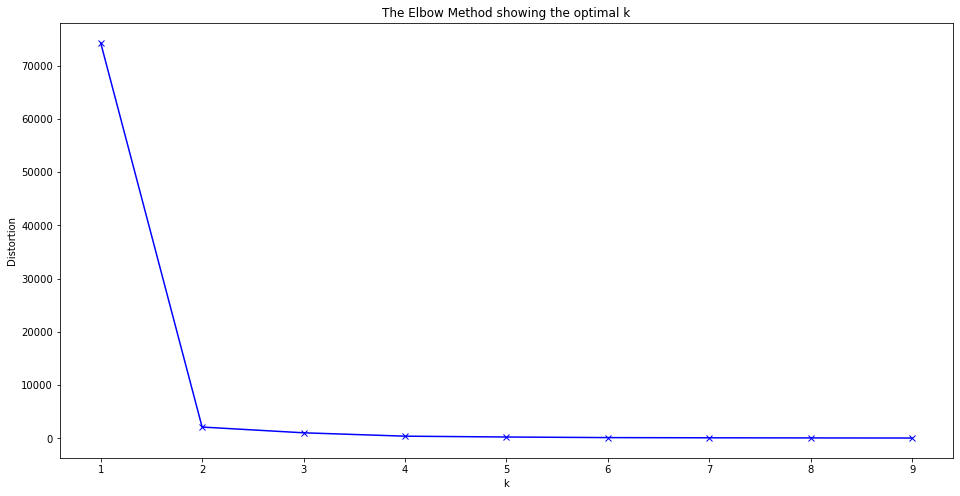

In [481]:
# sns.distplot(lasts)
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(lasts.values.reshape(-1, 1))
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [482]:
    kmeanModel = KMeans(n_clusters=2)
    kmeanModel.fit(lasts.values.reshape(-1, 1))

KMeans(n_clusters=2)

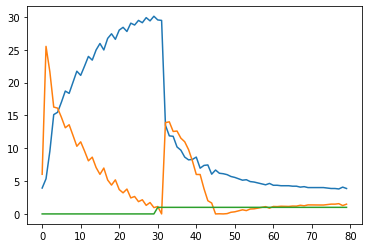

In [497]:
# np.repeat(kmeanModel.labels_,80)
plt.plot(train_df.loc[train_df.breath_id==125749,'pressure'].values)
plt.plot(train_df.loc[train_df.breath_id==125749,'u_in'].values)
plt.plot(train_df.loc[train_df.breath_id==125749,'u_out'].values)

# plt.plot(train_df.loc[train_df.breath_id==1,'u_in'].values)
# plt.plot(train_df.loc[train_df.breath_id==1,'pressure'].values)

In [455]:
# train_df.plot('area')
# plt.plot(train_df['area'])
# sns.distplot(train_df.loc[train_df.breath_id==1, "u_in_diff"])
# sns.distplot(train_df.loc[train_df.breath_id==2, "u_in_diff"])
# sns.distplot(train_df.loc[train_df.breath_id==173, "u_in_diff"])
# sns.distplot(train_df.loc[train_df.breath_id==4, "u_in_diff"])
# sns.distplot(np.log(train_df.groupby("breath_id").agg('max')['u_in_diff']+1))
# test
test2 = train_df.loc[train_df.breath_id.isin(test.breath_id.unique().tolist())]
# create_new_features

In [ ]:
from joblib import Parallel, delayed
def create_new_features(df):
    # Dict for aggregations
    create_feature_dict = {
        'wap1': [np.sum, np.std ],
        'wap2': [np.sum, np.std ],
        'wap3': [np.sum, np.std ],
        'wap4': [np.sum, np.std ],
#         'log_return1': [realized_volatility],
#         'log_return2': [realized_volatility],
#         'log_return3': [realized_volatility],
#         'log_return4': [realized_volatility],
        'wap_balance': [np.sum, np.max],
        'price_spread':[np.sum, np.max],
        'price_spread2':[np.sum, np.max],
        'bid_spread':[np.sum, np.max],
        'ask_spread':[np.sum, np.max],
        'total_volume':[np.sum, np.max],
        'volume_imbalance':[np.sum, np.max],
        "bid_ask_spread":[np.sum,  np.max],
    }
    create_feature_dict_time = {
        'log_return1': [realized_volatility],
        'log_return2': [realized_volatility],
        'log_return3': [realized_volatility],
        'log_return4': [realized_volatility],
    }
    

In [466]:
# test.groupby('breath_id')['u_in'].apply(cumsum)
# (test['u_in']).groupby(test['breath_id']).cumsum()
# test.groupby('breath_id').agg(cumsum)
tesss = train_df.iloc[train_df.groupby('breath_id')['u_in_diff'].idxmax()]
tesss2 = train_df.iloc[train_df.groupby('breath_id')['u_in'].idxmax()]

<AxesSubplot:xlabel='time_step', ylabel='Density'>

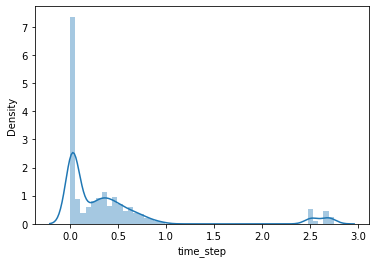

In [467]:
sns.distplot(tesss2.time_step)

In [ ]:
def lung_fea(df):
    df['total_pressure'] = ((df.u_in_diff)*(df.time_step.diff().fillna(0))).sum()